# Practice 1

Exploratory Data Analysis (EDA) is the process by which the data analyst becomes acquainted with their data to drive intuition and begin to formulate testable hypotheses. This process typically makes use of descriptive statistics and visualizations. To visualize text data, generally, we use the word cloud but there are some other techniques also, which we can try to visualize the data such as Frequency Distribution and Frequency Graph. Further we will try to construct such distributions.

Here, we will go over steps done in a typical machine learning text pipeline to clean data.
______________________________________________

Исследовательский анализ данных (EDA) - это процесс, посредством которого аналитик данных знакомится со своими данными, чтобы развить интуицию и начать формулировать проверяемые гипотезы. Этот процесс обычно использует описательную статистику и визуализации. Для визуализации текстовых данных, как правило, мы используем word cloud, но есть и некоторые другие методы, с помощью которых мы можем попытаться визуализировать данные, такие как частотное распределение и частотный график. Далее мы попытаемся построить такие распределения.

Здесь мы рассмотрим шаги, выполняемые в типичном текстовом конвейере машинного обучения для очистки данных.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Loading The Dataset:

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/english_data/Fake.csv', delimiter = ',')
true = pd.read_csv('/content/drive/MyDrive/english_data/True.csv', delimiter = ',')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake['target'] = 0
true['target'] = 1
df = pd.DataFrame()
df = true.append(fake)

<ipython-input-5-4fb6e36a1bae>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = true.append(fake)


In [ ]:
df.head()

,title,text,subject,date,target
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
print(df.shape)

(44898, 5)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   target   44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [ ]:
from sklearn.utils import shuffle
# Shuffle the data
df = shuffle(df).reset_index(drop=True)
df.head()

,title,text,subject,date,target
0,"In day of pro-Trump rallies, California march ...","BERKELEY, Calif./LANSING, Mich. (Reuters) - S...",politicsNews,"March 4, 2017",1
1,Lebanon's cabinet to meet Tuesday for first ti...,BEIRUT (Reuters) - Lebanon s cabinet will meet...,worldnews,"December 4, 2017",1
2,Henningsen: ‘US Anti-Trump Protests Similar to...,21st Century Wire says Organized efforts are u...,US_News,"November 12, 2016",0
3,WHY THIS Democrat Stronghold County Voted For ...,AP News The regulars amble in before dawn and...,politics,"Dec 27, 2017",0
4,Trump Supporters Object To Prince Harry’s Rec...,Great Britain s Buckingham Palace announced ye...,News,"November 28, 2017",0


<Axes: xlabel='target', ylabel='count'>

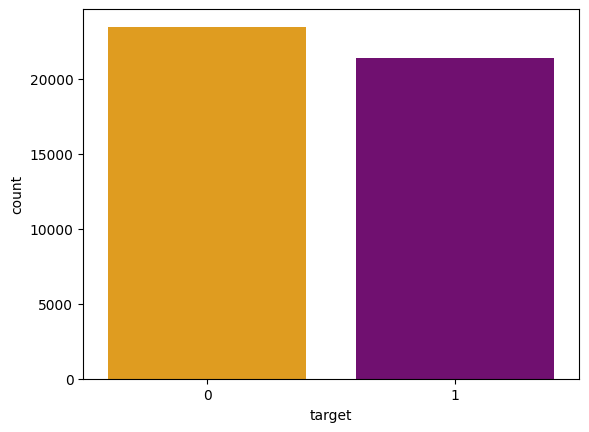

In [ ]:
# The method countplot from the seaborn library shows the counts of observations in each categorical bin using bars.
sns.countplot(x='target',data=df,palette=['orange','purple'])

In [ ]:
# Check if there are null values in the sample by summing all null values:
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [ ]:
df.dtypes

title      object
text       object
subject    object
date       object
target      int64
dtype: object

<Axes: xlabel='subject', ylabel='count'>

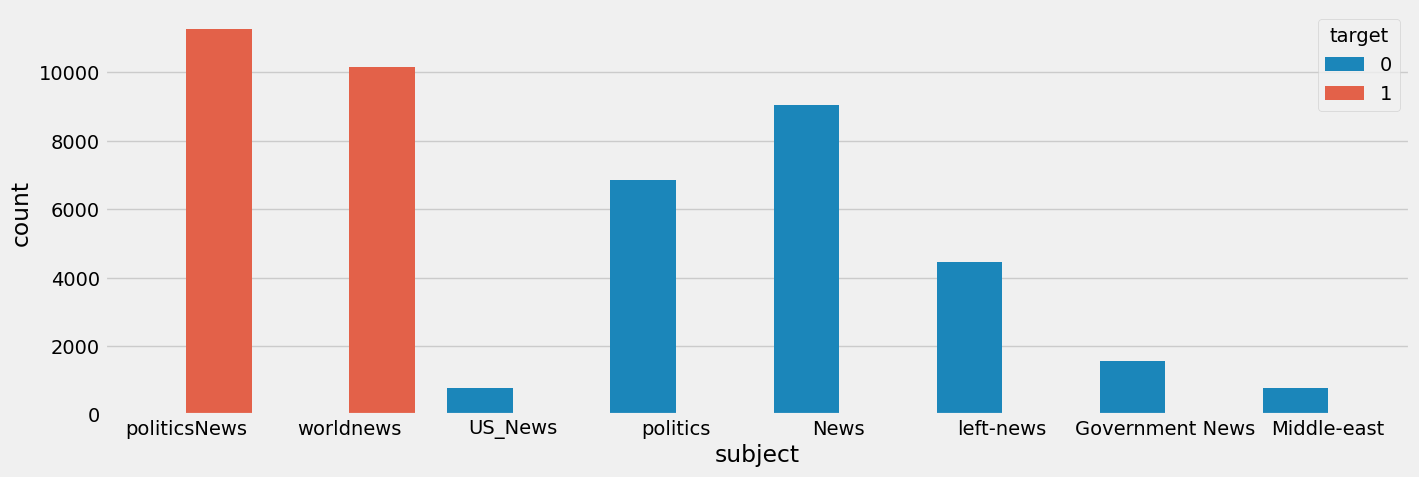

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,5))
sns.countplot(x='subject',data=df,hue='target')

Task 1: fivethirtyeight() or 538 plotting style creates beautiful graphs with bright colors and thick weight lines.
The font used by the style is Decima Mono. There are enough margins between the lines especially in histograms.
We can create our own edge color, linewidth, color change of the data under analysis etc with this style.

Task 2: Based on the results of the distribution we can see that we have true information only about world and politics in our dataset. There are more than 10000 news in each category. All the other news are fake including government, politics, US, Middle-east and left-news.

In [ ]:
df['text']=df['text']+" "+df['title']

In [ ]:
df.drop(['title','subject','date'],axis=1,inplace=True)
df.head()

,text,target
0,"BERKELEY, Calif./LANSING, Mich. (Reuters) - S...",1
1,BEIRUT (Reuters) - Lebanon s cabinet will meet...,1
2,21st Century Wire says Organized efforts are u...,0
3,AP News The regulars amble in before dawn and...,0
4,Great Britain s Buckingham Palace announced ye...,0


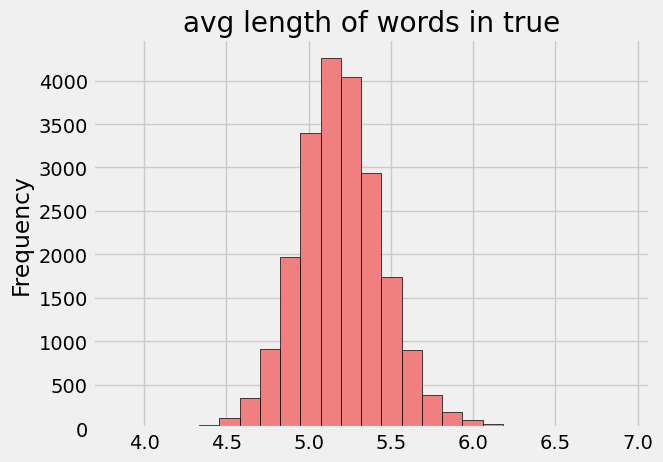

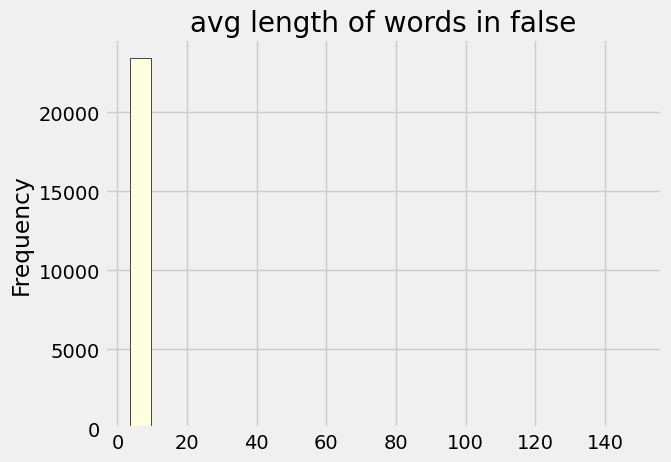

In [ ]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda
x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',bins = 25,
edgecolor='black',color='lightcoral',title='avg length of words in true')
plt.show()
avg_len_word=df[df['target']==0].text.str.split().map(lambda
x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',bins = 25,
edgecolor='black',color='lightyellow',title='avg length of words in false')
plt.show()

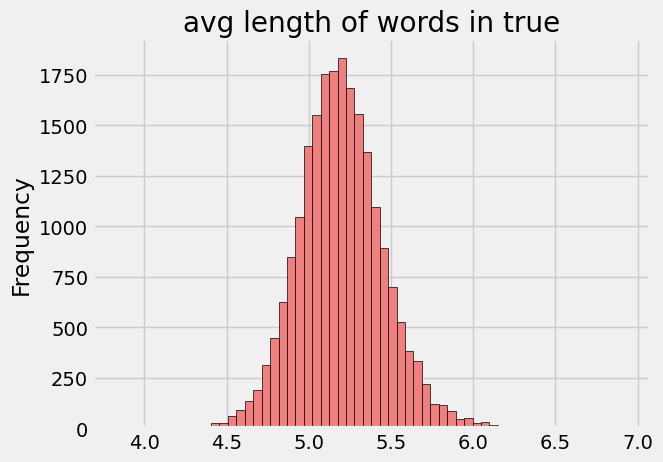

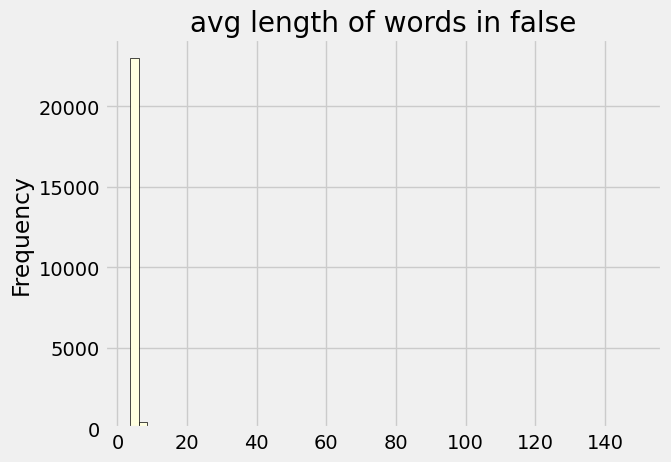

In [ ]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda
x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',bins = 60,
edgecolor='black',color='lightcoral',title='avg length of words in true')
plt.show()
avg_len_word=df[df['target']==0].text.str.split().map(lambda
x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',bins = 60,
edgecolor='black',color='lightyellow',title='avg length of words in false')
plt.show()

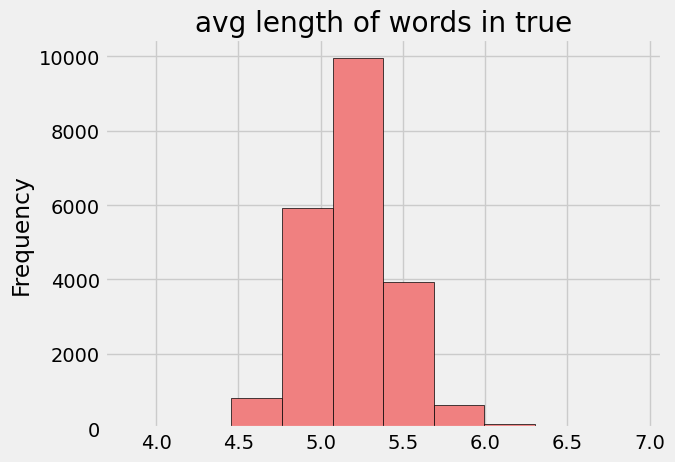

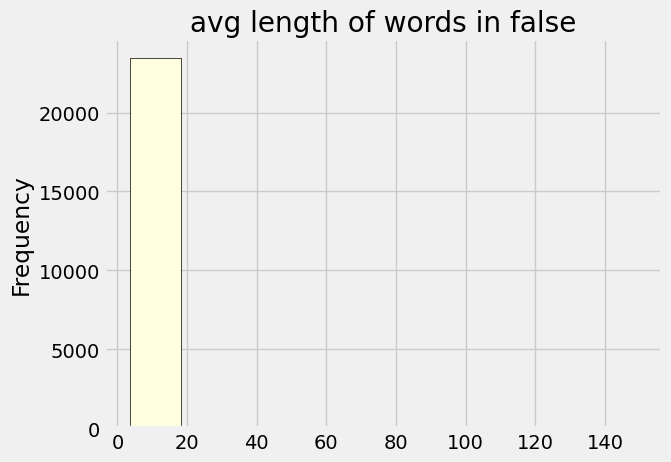

In [ ]:
avg_len_word=df[df['target']==1].text.str.split().map(lambda
x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',bins = 10,
edgecolor='black',color='lightcoral',title='avg length of words in true')
plt.show()
avg_len_word=df[df['target']==0].text.str.split().map(lambda
x:np.mean([len(word) for word in x]))
avg_len_word.plot(kind='hist',bins = 10,
edgecolor='black',color='lightyellow',title='avg length of words in false')
plt.show()

Task 3: Based on the plots we can notice that average length of the words in true is about 5-6 letters. But it's hard to say the average length of words in false, because the frequency is so big, that we can't create the accurate plot.

In [ ]:
from collections import Counter
# add a column ‘temp_list’ with separate words to dataframe
df['temp_list']=df['text'].apply(lambda x: str(x).split())
# count the frequency of words occurrence
top=Counter([word for li in df['temp_list'] for word in li])
# form the top 20 most frequently occurring words
temp_1=pd.DataFrame(top.most_common(20))
# set names to columns in temp_1 dataframe and display it in color
temp_1.columns=["most_common_words","frequency"]
temp_1.style.background_gradient(cmap='Blues')

,most_common_words,frequency
0,the,907070
1,to,538754
2,of,441512
3,and,393995
4,a,391144
5,in,327394
6,that,221170
7,on,185433
8,s,172260
9,for,169435


In [ ]:
import plotly.express as pe
import plotly.figure_factory as ff
fig = pe.bar(temp_1, x="frequency", y="most_common_words",
title='Commmon Words in Text', orientation='h',
width=700, height=700, color='most_common_words')
fig.show()

Task 4: On the resulting plot we can see the count of words used the most in bars. These words are prepositions, articles and so on.
Also some of them are repeated, for example, 'the' and 'The'. I think it's not that useful to know what article is used the most, because it doesn't give any meaningful information. Such feature as most_common_words is useful for the further text classification if you count only key words.

Task 5: To get more useful results in text data description, we should count only key words, so we can understand the main theme of the texts.

# Practice 2

In [ ]:
from collections import defaultdict
# define a function to get list of words according to the target class
def create_words(target):
  words = []
  for x in df[df['target']==target]['text'].str.split():
    for i in x:
      words.append(i)
  return words

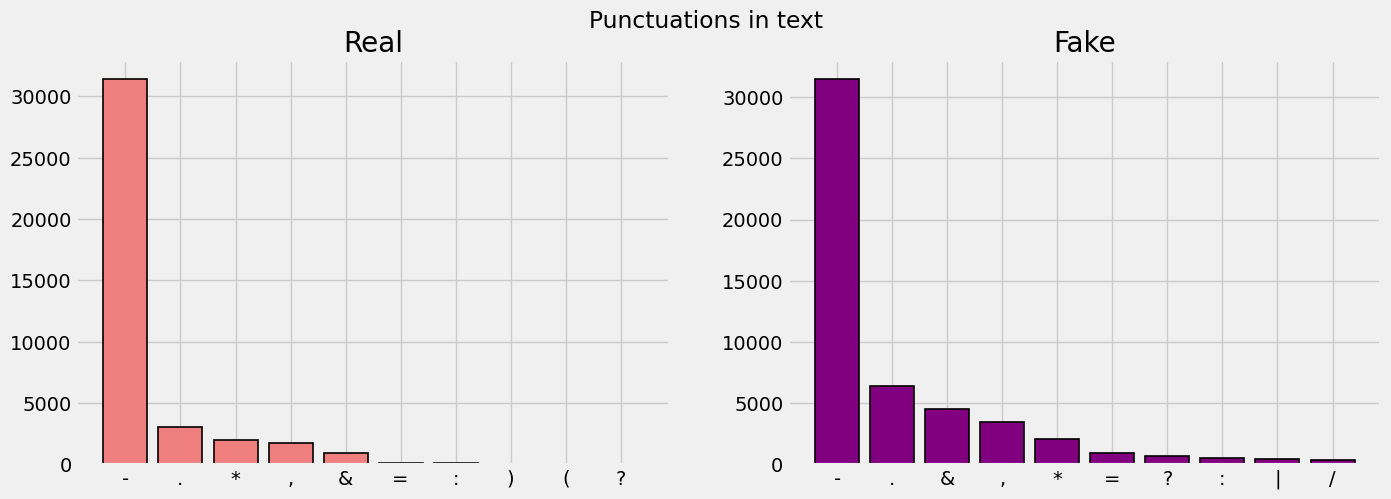

In [ ]:
import string
# create a list with punctuation symbols
punctuation_list=list(string.punctuation)
value_list=[]
# define a function counts most occuring punct. symbols
# according to the target class
# with arguments: dataframe, function_form_words_list, list_of_targets
def most_occuring(dataset,fun,target):
  d=defaultdict(int)
  for j in range(0,len(target)): # for every type of target
    words=fun(target[j]) # call function create_words()
    for i in words:
      if i in punctuation_list: # if word is punctuation symbol
        d[i]+=1 # count it
    # sort to 10 symbols by their count in descending order
    top=sorted(d.items(),key=lambda x: x[1],reverse=True)[:10]
    # separate punctuation symbols from their quantification
    x_items,y_counts=zip(*top)
    # append symbols and their quantification to value_list
    value_list.append(x_items)
    value_list.append(y_counts)
  fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
  ax1.bar(value_list[0],value_list[1],color="lightcoral",
  edgecolor='black', linewidth=1.2)
  ax1.set_title("Real")
  ax2.bar(value_list[2],value_list[3],color="purple",
  edgecolor='black', linewidth=1.2)
  ax2.set_title("Fake")
  plt.suptitle("Punctuations in text")
  plt.show()
most_occuring(df,create_words,[1,0])

Task 1: The difference is that a defaultdict will "default" a value if that key has not been set yet. If you didn't use a defaultdict
you'd have to check to see if that key exists, and if it doesn't, set it to what you want.

Task 2: First of all, punctuation is important to understand the correct meaning of the text. For example, if you write comma
in two diffefent places in one sentence you will get two different meanings. Secondly, we need to explore punctuation to check
if there are any watermarks or wrong punctuation marks like in spams and so on.

In [ ]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
#A list of words to be stemmed
word_list = ["friend", "friendship", "friends",
"friendships","stabil","destabilize","misunderstanding","railroad","moonlight","football"]
print("{0:20}{1:20}{2:20}".format("Word","Porter Stemmer","lancaster Stemmer"))
print(word_list)
ps = PorterStemmer()
ls = LancasterStemmer()
for word in word_list:
  print("{0:20}{1:20}{2:20}".format(word,ps.stem(word),ls.stem(word)))

Word                Porter Stemmer      lancaster Stemmer   
['friend', 'friendship', 'friends', 'friendships', 'stabil', 'destabilize', 'misunderstanding', 'railroad', 'moonlight', 'football']
friend              friend              friend              
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
stabil              stabil              stabl               
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             


Task 3:

In [ ]:
# Task 3:
word_list = []
for word in df['temp_list'][0]:
  temp = ''
  for letter in list(word):
    if letter not in string.punctuation:
      temp += letter
  if temp != '' and temp not in stopwords.words('english'):
    word_list.append(temp)
print("{0:20}{1:50}{2:50}".format("Word","Porter Stemmer","lancaster Stemmer"))
print(word_list)
ps0 = PorterStemmer()
ls0 = LancasterStemmer()
for word in word_list:
  print("{0:20}{1:20}{2:20}".format(word,ps.stem(word),ls.stem(word)))

Word                Porter Stemmer                                    lancaster Stemmer                                 
['BERKELEY', 'CalifLANSING', 'Mich', 'Reuters', 'Supporters', 'Donald', 'Trump', 'clashed', 'counterprotesters', 'rally', 'famously', 'leftleaning', 'city', 'Berkeley', 'California', 'day', 'mostly', 'peaceful', 'gatherings', 'support', 'US', 'president', 'across', 'country', 'At', 'park', 'Berkeley', 'across', 'bay', 'San', 'Francisco', 'protesters', 'sides', 'struck', 'one', 'another', 'head', 'wooden', 'sticks', 'Trump', 'supporters', 'fired', 'pepper', 'spray', 'police', 'riot', 'gear', 'stood', 'distance', 'Some', 'proTrump', 'crowd', 'holding', 'American', 'flags', 'faced', 'blackclad', 'opponents', 'An', 'elderly', 'Trump', 'supporter', 'struck', 'head', 'kicked', 'ground', 'Organizers', 'socalled', 'Spirit', 'America', 'rallies', 'least', '28', 'country’s', '50', 'states', 'said', 'expected', 'smaller', 'turnouts', 'huge', 'crowds', 'antiTrump', 'protesters',

In [ ]:
import re
import string
from nltk.corpus import stopwords
def clean_text(text):
  lemmatizer = WordNetLemmatizer()
  stopwords_english = stopwords.words('english')
  text= re.sub('\[[^]]*\]', '', text)
  # remove stock market tickers like $GE
  text = re.sub(r'\$\w*', '', text)
  #removal of html tags
  review =re.sub(r'<.*?>',' ',text)
  # remove old style retweet text "RT"
  text = re.sub(r'^RT[\s]+', '', text)
  # remove hyperlinks
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  # remove hashtags
  # only removing the hash # sign from the word
  text = re.sub(r'#', '', text)
  text = re.sub("["
                  u"\U0001F600-\U0001F64F" # removal of emoticons
                  u"\U0001F300-\U0001F5FF" # symbols & pictographs
                  u"\U0001F680-\U0001F6FF" # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                  u"\U00002702-\U000027B0"
                  u"\U000024C2-\U0001F251"
                  "]+",' ',text)
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text_tokens =word_tokenize(text)
  text_clean = []
  for word in text_tokens:
    if (word not in stopwords_english and # remove stopwords
      word not in string.punctuation): # remove punctuation
      lem_word =lemmatizer.lemmatize(word) # lemmatizing word
      text_clean.append(lem_word)
  text_mod=[i for i in text_clean if len(i)>2]
  text_clean=' '.join(text_mod)
  return text_clean

Task 4: clean_text() is a function which removes all the unnecessary details from the text, for example, stock market tickets,
html tags, hyperlinks, hashtags. It also removes punctuation, stopwords and lemmatize words in the text.

In [ ]:
import nltk
nltk.download('omw-1.4')

df['clean_text']=df['text'].apply(lambda x: clean_text(x))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['clean_temp']=df['clean_text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['clean_temp'] for word in li])
temp_2=pd.DataFrame(top.most_common(20))
temp_2.columns=["common_words",'frequency']
temp_2.style.background_gradient(cmap='Blues')

,common_words,frequency
0,trump,142609
1,said,131174
2,state,61511
3,president,56889
4,would,54309
5,year,41475
6,people,40894
7,republican,40778
8,one,38265
9,new,32225


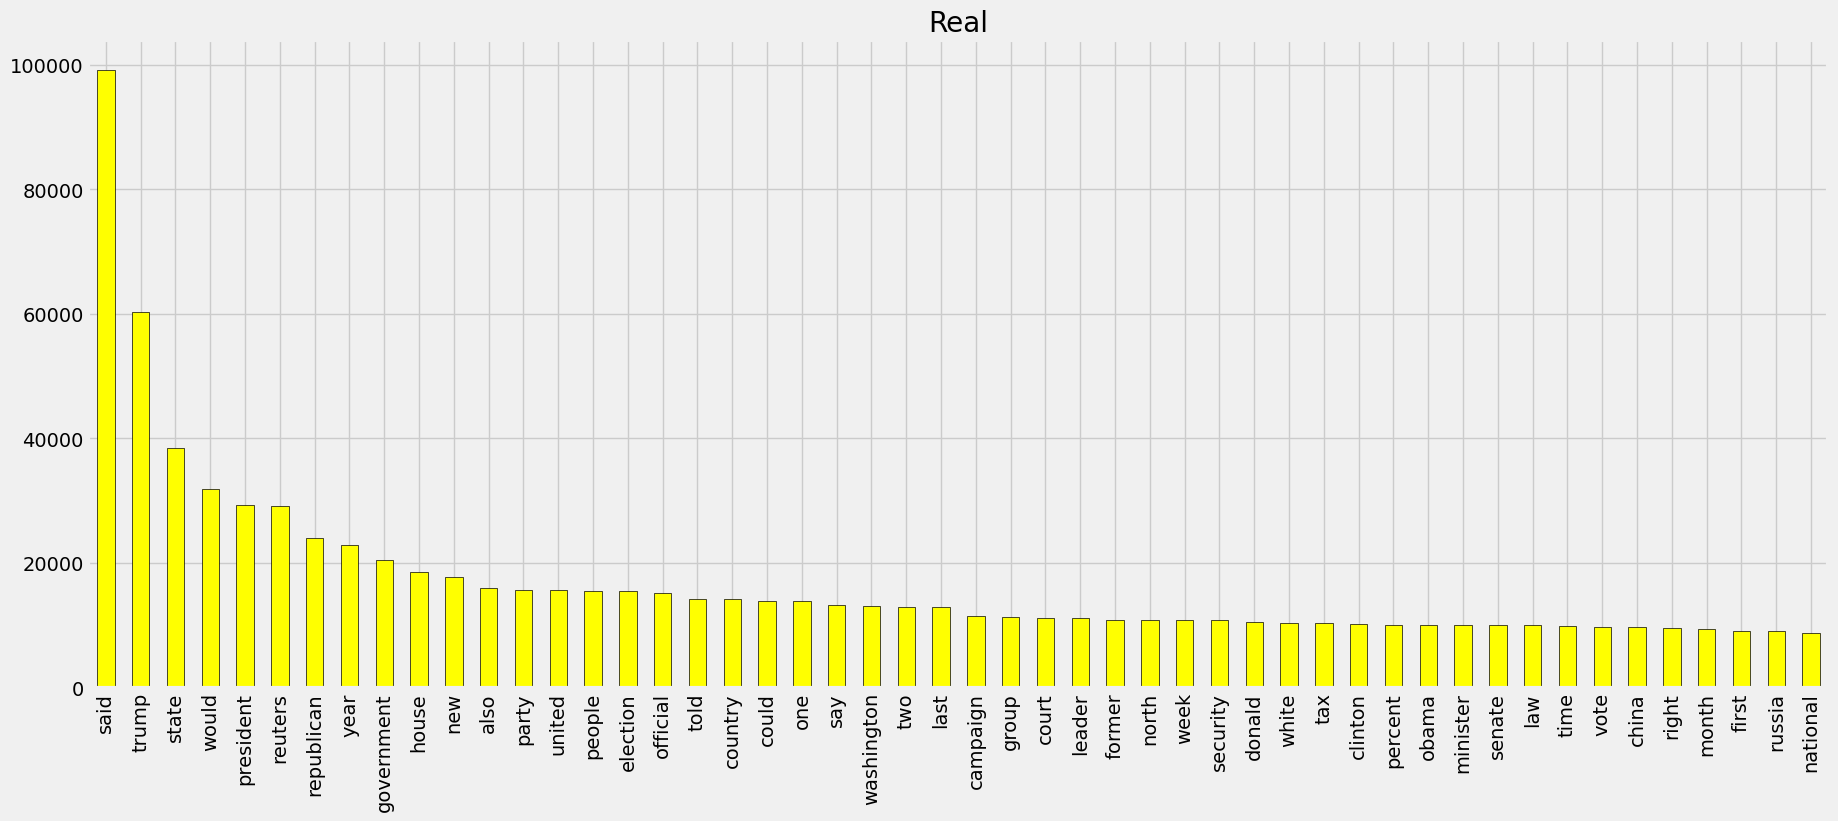

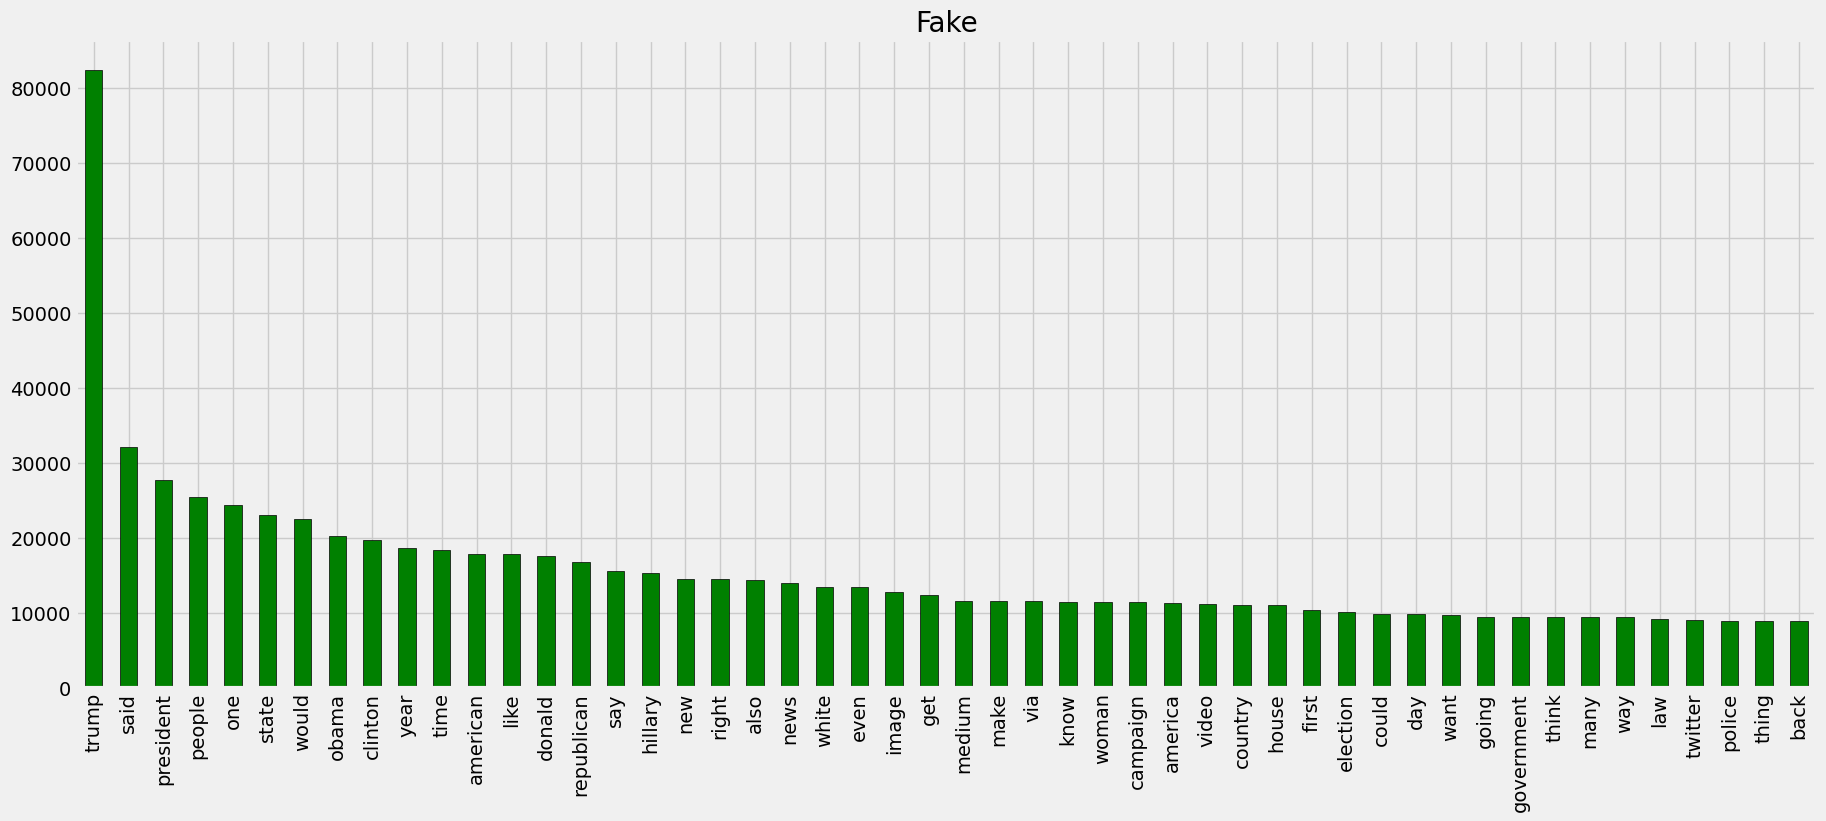

In [ ]:
data_1=df[df['target']==1]
pd.Series(' '.join([i for i in data_1.clean_text]).split()).value_counts()[:50].plot(kind='bar',figsize=(20,8),color='yellow',
                                                                                     edgecolor='black',title='Real')
plt.show()
data_0=df[df['target']==0]
pd.Series(' '.join([i for i in data_0.clean_text]).split()).value_counts()[:50].plot(kind='bar',figsize=(20,8),color='green',
                                                                                     edgecolor='black',title='Fake')
plt.show()

Task 5

In [ ]:
# Task 5:
def clean_text_stem(text):
  stemmer = PorterStemmer()
  stopwords_english = stopwords.words('english')
  text= re.sub('\[[^]]*\]', '', text)
  # remove stock market tickers like $GE
  text = re.sub(r'\$\w*', '', text)
  #removal of html tags
  review =re.sub(r'<.*?>',' ',text)
  # remove old style retweet text "RT"
  text = re.sub(r'^RT[\s]+', '', text)
  # remove hyperlinks
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  # remove hashtags
  # only removing the hash # sign from the word
  text = re.sub(r'#', '', text)
  text = re.sub("["
                  u"\U0001F600-\U0001F64F" # removal of emoticons
                  u"\U0001F300-\U0001F5FF" # symbols & pictographs
                  u"\U0001F680-\U0001F6FF" # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                  u"\U00002702-\U000027B0"
                  u"\U000024C2-\U0001F251"
                  "]+",' ',text)
  text = re.sub('[^a-zA-Z]',' ',text)
  text = text.lower()
  text_tokens =word_tokenize(text)
  text_clean = []
  for word in text_tokens:
    if (word not in stopwords_english and # remove stopwords
      word not in string.punctuation): # remove punctuation
      stem_word = stemmer.stem(word) # stemming word
      text_clean.append(stem_word)
  text_mod=[i for i in text_clean if len(i)>2]
  text_clean=' '.join(text_mod)
  return text_clean

In [ ]:
df['clean_text']=df['text'].apply(lambda x: clean_text_stem(x))

In [ ]:
df['clean_temp']=df['clean_text'].apply(lambda x: str(x).split())
top=Counter([word for li in df['clean_temp'] for word in li])
temp_2=pd.DataFrame(top.most_common(50))
temp_2.columns=["common_words",'frequency']
temp_2.style.background_gradient(cmap='Blues')

,common_words,frequency
0,trump,142666
1,said,131174
2,state,63481
3,presid,60366
4,would,54309
5,year,41475
6,peopl,40894
7,republican,40790
8,say,39589
9,one,38265


Task 6:

In [ ]:
# Task 6:
import plotly.graph_objects as pltl
fig = pltl.Figure(data=[pltl.Table(header=dict(values=['most common words', 'frequency']),
                                   cells=dict(values=[temp_2['common_words'], temp_2['frequency']]))])
fig.show()

In [ ]:
data_1_stem= df['clean_text'][df['target']==1]
top = Counter([word for li in data_1_stem for word in li.split()])
figg = pltl.Figure(data=[pltl.Bar(x=temp_2['common_words'],y=temp_2['frequency'])])
figg.show()

Task 7:
The approaches stemming and lemmatization are very similar actually. Both focusses to extract the root word from a text token
by removing the additional parts of this token. The main difference of these two methods is stemming can return an outcome which
has no meaning but the lemmatization does not. Because the lemmatization is scanning the related words on WordNet corpus
but stemming sometimes does not create actual words. The scanning of a word on the corpus makes lemmatization is slower
than stemming but more accurate on the results. So while the stemming offers the speed, lemmatization offers the accuracy.

# Practice 3

**Task 1:**
Machine learning is a branch of artificial intelligence (AI) and computer science which focuses on the use of data and algorithms to imitate the way that humans learn, gradually improving its accuracy.
*Supervised machine learning* is defined by its use of labeled datasets to train algorithms to classify data or predict outcomes accurately. Supervised learning contains classification and regression.

*   Document/Text *classification* is one of the important and typical task in supervised machine learning (ML). Assigning categories to documents, which can be a web page, library book, media articles, gallery etc. has many applications like e.g. spam filtering, email routing, sentiment analysis etc.
*   In doing a *regression*, we are trying to fit a model to the data that was observed so that we can use this model to predict the future. Regression is a technique to quantify the substance of what is observed in the world into a simplified model.

*Unsupervised machine learning* uses machine learning algorithms to analyze and cluster unlabeled datasets.

*   *Clustering* is a data mining technique which groups unlabeled data based on their similarities or differences. K-means clustering is a common example of an exclusive clustering method where data points are assigned into K groups, where K represents the number of clusters based on the distance from each group’s centroid.
*   *Dimensionality* reduction is a technique used when the number of features, or dimensions, in a given dataset is too high. It reduces the number of data inputs to a manageable size while also preserving the integrity of the dataset as much as possible.

*Reinforcement machine learning* is a machine learning model that is similar to supervised learning, but the algorithm isn’t trained using sample data. This model learns as it goes by using trial and error. A sequence of successful outcomes will be reinforced to develop the best recommendation or policy for a given problem.

**Task 2:**
Text vectorization (word embedding) is the process of converting text data into numeric vectors.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# max_features: The CountVectorizer will select the
# words/features/terms which occur the most frequently.
# It takes absolute values so if you set the ‘max_features = 3’,
# it will select the 3 most common words in the data.
countv = CountVectorizer(max_features = 1000)
X = countv.fit_transform(df.clean_text).toarray()
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

**Task 3**

In [ ]:
print(countv.vocabulary_)

{'reuter': 765, 'support': 875, 'donald': 261, 'trump': 927, 'protest': 702, 'ralli': 718, 'left': 503, 'citi': 155, 'california': 122, 'day': 224, 'peac': 646, 'presid': 675, 'across': 9, 'countri': 204, 'san': 784, 'side': 825, 'one': 621, 'anoth': 48, 'head': 399, 'fire': 338, 'polic': 660, 'pro': 687, 'crowd': 215, 'hold': 410, 'american': 45, 'flag': 342, 'face': 314, 'black': 102, 'ground': 388, 'organ': 629, 'call': 123, 'america': 44, 'least': 500, 'state': 859, 'said': 783, 'expect': 309, 'turn': 931, 'anti': 50, 'street': 867, 'washington': 963, 'republican': 753, 'white': 976, 'hous': 415, 'ask': 68, 'obama': 612, 'investig': 448, 'energi': 287, 'futur': 364, 'need': 593, 'battl': 86, 'lot': 527, 'group': 389, 'thought': 902, 'import': 427, 'show': 824, 'gay': 368, 'help': 405, 'saturday': 787, 'mani': 537, 'town': 918, 'hundr': 418, 'peopl': 648, 'risk': 770, 'small': 835, 'total': 916, 'number': 611, 'spokesman': 852, 'three': 906, 'includ': 430, 'made': 531, 'five': 341, 

We print out the dictionary that we get with CountVectorizer. It contains the word and its quantity in the text. But this vocabulary has no sorting, neither by reduction, nor alphabetically.

**Task 4**

In [ ]:
print(X_train)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
print(y_train)

[0 0 1 ... 0 0 0]


X is an array of 1000 columns where each one is corresponding to a presence of a word for vocabulary in this exact text.

y is the float target vector of shape (n_samples) (the label vector). In our case, label 0 could correspond to a fake news, and 1 to a true one.

**Task 5:**
Suppose we have dataset and if we want to split it into training dataset and testing dataset and size of testing dataset is 20% of the whole dataset.

So we ensure that a random process will output the same result every time, which makes code reproducible. Because if we do not shuffle dataset then it will produce different datasets every time and it is not good to train model with different data every time.

For all random datasets, each assign with a random_state value. It means one random_state value has a fixed dataset. It means every time we run code with random_state value 1, it will produce the same splitting datasets. We can use any integer as a value or 'none', if we want to get different results in every execution.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = df.clean_text
y = df.iloc[:, 1].values

**Task 6:**
In the code above variable X contains clean text after lemmatization and variable y contains a list of target values, where 0 is fake news and 1 is true news.  

In [ ]:
print(X)

0        berkeley calif lans mich reuter support donald...
1        beirut reuter lebanon cabinet meet tuesday fir...
2        centuri wire say organ effort underway democra...
3        news regular ambl dawn claim usual tabl one ne...
4        great britain buckingham palac announc yesterd...
                               ...                        
44893    month ago peopl start notic larg black man alw...
44894    cultur make nation great except unfortun elect...
44895    mani reaction horrif shoot republican basebal ...
44896    follow statement post verifi twitter account p...
44897    washington reuter presid donald trump open doo...
Name: clean_text, Length: 44898, dtype: object


In [ ]:
print(y)

[1 1 0 ... 0 1 1]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 123)

In [ ]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)
tfidf_train

<35918x71851 sparse matrix of type '<class 'numpy.float64'>'
	with 4811193 stored elements in Compressed Sparse Row format>

**Task 7**

In [ ]:
df['TF-IDF score'] = df['clean_text'].apply(lambda x: my_tfidf.transform([x]))
print(df)

                                                    text  target  \
0       BERKELEY, Calif./LANSING, Mich. (Reuters) - S...       1   
1      BEIRUT (Reuters) - Lebanon s cabinet will meet...       1   
2      21st Century Wire says Organized efforts are u...       0   
3      AP News  The regulars amble in before dawn and...       0   
4      Great Britain s Buckingham Palace announced ye...       0   
...                                                  ...     ...   
44893  About a month ago, people started noticing a l...       0   
44894  Our culture is what makes this Nation great an...       0   
44895  There have been many reactions to the horrific...       0   
44896  The following statements were posted to the ve...       1   
44897  WASHINGTON (Reuters) - While President Donald ...       1   

                                               temp_list  \
0      [BERKELEY,, Calif./LANSING,, Mich., (Reuters),...   
1      [BEIRUT, (Reuters), -, Lebanon, s, cabinet, wi...   
2  

**Task 8:**
*CountVectorizer* is a method for counting word frequency in text. Each word from the whole text represents by a matrix column, each text instance is a matrix row. And value of each cell shows the number of the word in that particular text sample.

*TF-IDF* also creates a matrix of document terms, and each column represents a single unique word, but cells contain weight values that signifies how important a word is for an individual text, where less frequent events get more weight and expected events get less weight.

# Practice 4

**Task 1:** Word2vec embeddings on the base of a skip-gram.

Skip-Gram method provides a word to our Neural Network and ask it to predict the context.

We don’t actually use this trained Neural Network. Instead, the goal is just to learn the weights of the hidden layer while predicting the surrounding words correctly. These weights are the word embeddings. How many neighboring words the network is going to predict is determined by a parameter called “window size”. This window extends in both the directions of the word, i.e. to its left
and righ.

Input is an M-dimentional vector given by our vocabulary size (for example, 10 000), containing a 1 corresponding to the position of our target word. The hidden layer weight matrix shape will be M x N, where M = vocabulary size (10,000) and N = hidden layer neurons (for example, 300). Once the model gets trained, the final word embedding for our target word will be given by the following calculation:
1×10000 input vector * 10000×300 matrix = 1×300 vector (output vector).

**Task 2:** Word2Vec embeddings on the base of CBOW.

The CBOW  (Continuous Bag of Words) is the mirror image of the skip-gram approach. We input the context into the model and ask the network to predict the current word.

The input is C context words in the form of a one-hot encoded vector of size 1xV each, where V = size of vocabulary, making the entire input C×V dimensional. Now, each of these C vectors will be multiplied with the Weights of our hidden layer (shape V×N, where V = vocab size and N = Number of neurons in the hidden layer). This will result in C, 1×N vectors, and all of these C vectors will be averaged element-wise to obtain our final activation for the hidden layer, which then will be fed into our output softmax layer. The learned weight between the hidden and output layer makes up the word embedding representation.

In [ ]:
import gensim

In [ ]:
from gensim import corpora
# How to create a dictionary from a list of sentences?
documents = ['data science is one of the most important fields of science',
'this is one of the best data science courses',
'data scientists analyze data']
# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]
# Create dictionary
dictionary = corpora.Dictionary(texts)
# Get information about the dictionary
print(dictionary)

Dictionary<14 unique tokens: ['data', 'fields', 'important', 'is', 'most']...>


In [ ]:
# Show the word to id map
print(dictionary.token2id)

{'data': 0, 'fields': 1, 'important': 2, 'is': 3, 'most': 4, 'of': 5, 'one': 6, 'science': 7, 'the': 8, 'best': 9, 'courses': 10, 'this': 11, 'analyze': 12, 'scientists': 13}


In [ ]:
from gensim.models import Word2Vec
# train model
model = Word2Vec(texts, min_count=1)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
# access vector for one word
print(model.wv.get_vector('scientists'))
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec<vocab=14, vector_size=100, alpha=0.025>
['data', 'of', 'science', 'the', 'one', 'is', 'analyze', 'scientists', 'courses', 'best', 'this', 'fields', 'important', 'most']
[ 8.1681199e-03 -4.4430327e-03  8.9854337e-03  8.2536647e-03
 -4.4352221e-03  3.0310510e-04  4.2744912e-03 -3.9263200e-03
 -5.5599655e-03 -6.5123225e-03 -6.7073823e-04 -2.9592158e-04
  4.4630850e-03 -2.4740540e-03 -1.7260908e-04  2.4618758e-03
  4.8675989e-03 -3.0808449e-05 -6.3394094e-03 -9.2608072e-03
  2.6657581e-05  6.6618943e-03  1.4660227e-03 -8.9665223e-03
 -7.9386048e-03  6.5519023e-03 -3.7856805e-03  6.2549924e-03
 -6.6810320e-03  8.4796622e-03 -6.5163244e-03  3.2880199e-03
 -1.0569858e-03 -6.7875278e-03 -3.2875966e-03 -1.1614120e-03
 -5.4709399e-03 -1.2113475e-03 -7.5633135e-03  2.6466595e-03
  9.0701487e-03 -2.3772502e-03 -9.7651005e-04  3.5135616e-03
  8.6650876e-03 -5.9218528e-03 -6.8875779e-03 -2.9329848e-03
  9.1476962e-03  8.6626766e-04 -8.6784009e-03 -1.4469790e-03
  9.4794659e-03 -7.5494875e-0

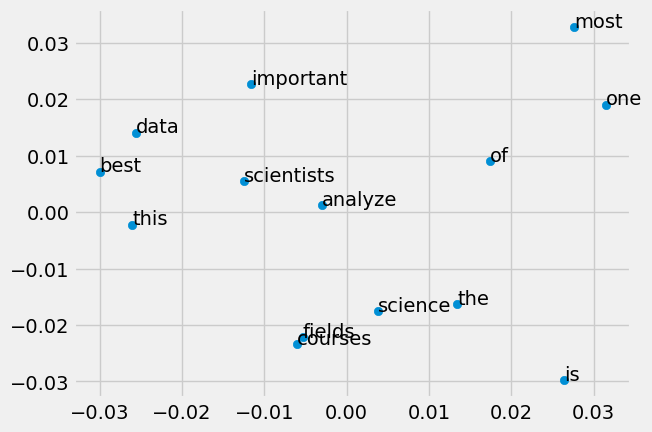

In [ ]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# fit a 2d PCA model to the vectors
X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
  pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

**Task 3:** The model.wv property holds the words-and-vectors. The vocabulary is in the vocab field of the Word2Vec model's wv property, as a dictionary, with the keys being each token (word).

PCA method (Principal Component Analysis) is trying to reduce the dimensionality of the input data. We point two components, but these two features are just a segment of a much larger dataset with many, many more features (x3, x4… xn). This dimensionality reduction will sacrifice some information, but what we are trying to do is find the line that minimizes the loss of information.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from gensim.models import KeyedVectors
# load the google word2vec model
filename = '/content/drive/MyDrive/english_data/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)
# calculate: (king - man) + woman = ?
result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
print(result)

[('queen', 0.7118193507194519)]


**Task 5**

In [ ]:
result2 = model.most_similar(positive=['happy'], topn=10)
print(result2)

[('glad', 0.7408890724182129), ('pleased', 0.6632170677185059), ('ecstatic', 0.6626912355422974), ('overjoyed', 0.6599286794662476), ('thrilled', 0.6514049172401428), ('satisfied', 0.6437949538230896), ('proud', 0.636042058467865), ('delighted', 0.627237856388092), ('disappointed', 0.6269949674606323), ('excited', 0.6247665286064148)]


**Task 6 and 7**

In [ ]:
from gensim import corpora
from gensim.models import Word2Vec
df['clean_text'].fillna('', inplace = True)
documents = df['clean_text']
texts = [[text for text in doc.split()] for doc in documents]
dictionary = corpora.Dictionary(texts)
print(dictionary)

Dictionary<78924 unique tokens: ['accord', 'across', 'action', 'america', 'american']...>


In [ ]:
model_ft = Word2Vec(texts, min_count=1)
print(model_ft)
words = list(model_ft.wv.index_to_key)
print(words)
print(model_ft.wv['sun'])
model_ft.save('model_ft.bin')
new_model_ft = Word2Vec.load('model_ft.bin')
print(new_model_ft)

Word2Vec<vocab=78924, vector_size=100, alpha=0.025>
['trump', 'said', 'state', 'presid', 'would', 'year', 'peopl', 'republican', 'say', 'one', 'new', 'elect', 'govern', 'hous', 'obama', 'also', 'clinton', 'reuter', 'like', 'report', 'democrat', 'time', 'donald', 'nation', 'call', 'support', 'american', 'countri', 'unit', 'senat', 'right', 'campaign', 'parti', 'white', 'could', 'make', 'vote', 'told', 'offici', 'two', 'last', 'get', 'use', 'news', 'polit', 'want', 'work', 'includ', 'law', 'offic', 'first', 'group', 'back', 'take', 'washington', 'even', 'secur', 'former', 'hillari', 'day', 'week', 'court', 'show', 'plan', 'attack', 'mani', 'media', 'polic', 'bill', 'leader', 'may', 'come', 'administr', 'made', 'need', 'accord', 'million', 'think', 'russia', 'ask', 'know', 'percent', 'sinc', 'tax', 'month', 'investig', 'way', 'issu', 'presidenti', 'forc', 'america', 'member', 'statement', 'imag', 'north', 'rule', 'help', 'polici', 'meet', 'public', 'talk', 'tri', 'gener', 'see', 'feder', 

In [ ]:
result_ft = model_ft.wv.most_similar(positive=['america'], topn=15)
print(result_ft)

[('american', 0.651462972164154), ('world', 0.5837969779968262), ('countri', 0.568231463432312), ('planet', 0.5459028482437134), ('truli', 0.5070783495903015), ('evil', 0.49631577730178833), ('nightmar', 0.48053011298179626), ('concept', 0.47561076283454895), ('sadli', 0.47499385476112366), ('dream', 0.4703991413116455), ('realli', 0.4673200249671936), ('legaci', 0.4665202498435974), ('ideal', 0.46330422163009644), ('ever', 0.45595094561576843), ('perhap', 0.44747084379196167)]


**Task 8**

In [ ]:
print(model_ft.predict_output_word(['good', 'candidate', 'is']))

[('news', 0.4206984), ('luck', 0.31889215), ('pretti', 0.03253258), ('faith', 0.030005591), ('thing', 0.01750102), ('samaritan', 0.011486232), ('relationship', 0.0053467513), ('riddanc', 0.0047439802), ('guy', 0.004413681), ('friend', 0.004116451)]


In [ ]:
# Сохранение DataFrame в CSV-файл
df.to_csv('/content/drive/MyDrive/english_data/dataframe_practice.csv', index=False)

# Practice 5

**Task 1**

In [ ]:
import numpy as np
from scipy import spatial
emmbed_dict = {}
with open('/content/drive/MyDrive/english_data/glove.6B/glove.6B.100d.txt','r', encoding="utf8") as f:
 for line in f:
  values = line.split()
  word = values[0]
  vector = np.asarray(values[1:],'float32')
  emmbed_dict[word]=vector

In [ ]:
emmbed_dict['india']

array([-0.95967  ,  0.30795  ,  0.90052  ,  1.0364   ,  0.0034906,
       -0.80758  , -1.139    ,  0.81109  , -0.67857  ,  0.52609  ,
       -0.072252 , -0.75613  ,  0.52847  ,  1.0927   , -0.51895  ,
       -0.21335  ,  0.18184  ,  0.40038  , -0.6547   ,  0.34626  ,
        0.92248  , -0.25001  ,  1.1779   ,  0.61006  ,  0.029763 ,
        0.4378   ,  0.53647  ,  0.68827  ,  0.14582  , -0.27446  ,
       -0.50289  ,  1.0366   , -0.29851  , -0.32927  ,  0.24944  ,
       -0.33779  ,  0.0083236, -0.21373  , -0.45898  , -0.23441  ,
       -1.2958   ,  0.74799  ,  0.78192  , -0.75644  ,  0.84375  ,
       -0.51725  ,  1.0952   ,  0.51768  ,  0.27906  , -0.033519 ,
       -0.1573   ,  0.7396   ,  0.39775  ,  1.132    , -0.69279  ,
       -2.0093   , -1.1731   , -0.14204  ,  1.5658   , -0.097956 ,
       -0.071165 , -0.18906  ,  0.037441 ,  0.48037  ,  0.29248  ,
        0.9216   ,  0.33285  ,  0.30963  ,  1.1272   ,  0.19965  ,
        0.47058  ,  0.019022 , -0.27432  , -0.49782  , -0.2944

**Task 2**

In [ ]:
# Define a function similar_word(vector), that finds 10 nearest words with an Euclidian metrics
def similar_word(vector):
  return sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], vector))[:10]

In [ ]:
# Output 10 nearest words to word ‘holiday’.
print(similar_word(emmbed_dict['holiday']))

['holiday', 'christmas', 'holidays', 'thanksgiving', 'easter', 'vacation', 'festive', 'weekend', 'day', 'eve']


**Task 3**

In [ ]:
# Pass to the defined function a result of vector sum: (emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince'])
print(similar_word(emmbed_dict['king'] + emmbed_dict['queen'] + emmbed_dict['prince']))

['king', 'queen', 'prince', 'princess', 'throne', 'royal', 'son', 'crown', 'emperor', 'father']


**Task 4**

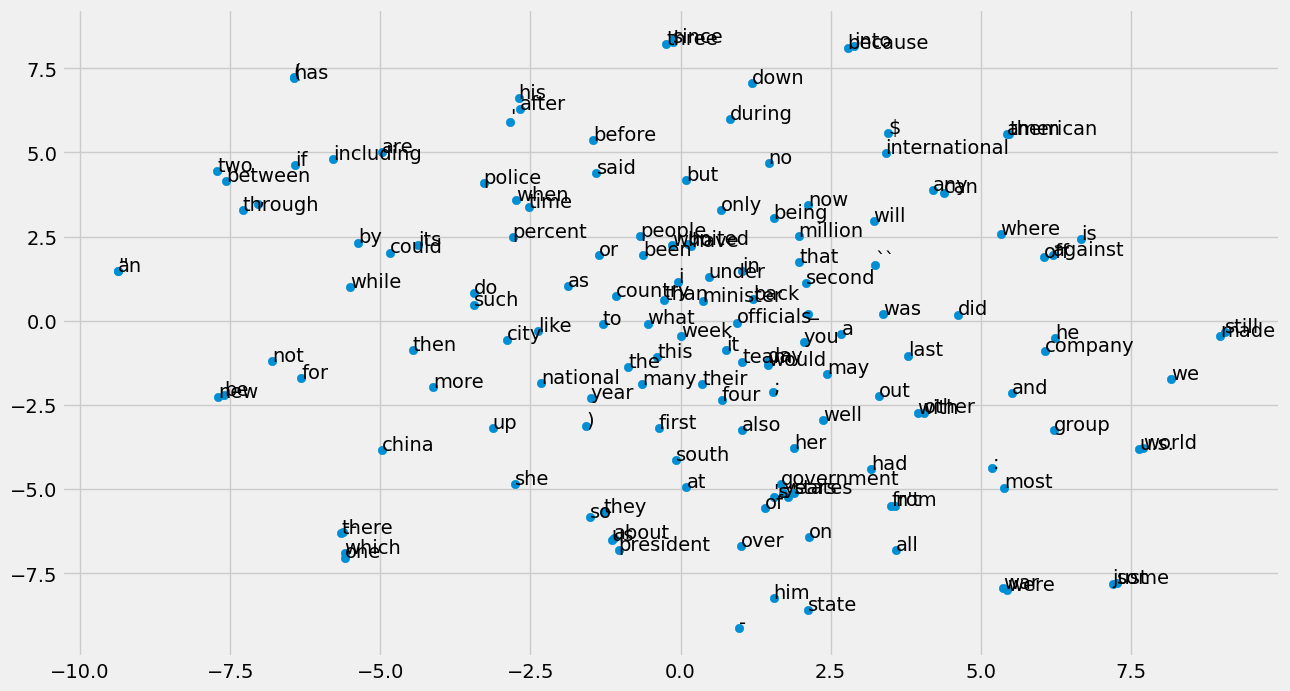

In [ ]:
import matplotlib.pyplot as plt # need for visualization
from sklearn.manifold import TSNE # need to reduce dimention
distri = TSNE(n_components=2) # 2d data visualization
words = list(emmbed_dict.keys()) # list of words in dictionary
vectors = [emmbed_dict[word] for word in words] # list of vectors in dictionary
y = distri.fit_transform(np.array(vectors[700:850])) # 2d coordinates of vectors
plt.figure(figsize=(14,8)) # size of the figure
plt.scatter(y[:, 0],y[:,1]) # plot the 2d coodinates
for label,x,y in zip(words,y[:, 0],y[:,1]): #
 plt.annotate(label,xy=(x,y),xytext=(0,0),textcoords='offset points') #
plt.show() # show the plot

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
glove_input_file = '/content/drive/MyDrive/english_data/glove.6B/glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

<ipython-input-67-9c5529fbfc30>:4: DeprecationWarning:

Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).



(400000, 100)

**Task 5**

In [ ]:
emmbed_dict_w2v = {}
with open(word2vec_output_file,'r', encoding="utf8") as f:
 for line in f:
  values = line.split()
  word = values[0]
  vector = np.asarray(values[1:],'float32')
  emmbed_dict_w2v[word]=vector

def similar_word2vec(vector):
  return sorted(emmbed_dict_w2v.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict_w2v[word], vector))[:10]

In [ ]:
print(similar_word2vec(emmbed_dict_w2v['holiday']))

['holiday', 'christmas', 'holidays', 'thanksgiving', 'easter', 'vacation', 'festive', 'weekend', 'day', 'eve']


In [ ]:
print(similar_word2vec(emmbed_dict_w2v['king'] + emmbed_dict_w2v['queen'] + emmbed_dict_w2v['prince']))

['king', 'queen', 'prince', 'princess', 'throne', 'royal', 'son', 'crown', 'emperor', 'father']


# Practice 6

In [ ]:
import pandas as pd
from gensim.models import FastText
# some example sentences
from gensim.test.utils import common_texts
print(common_texts[8]) # output the example of text
print(len(common_texts)) # output the number of texts
tokenised_sentences = common_texts[:]
tokenised_sentences

['graph', 'minors', 'survey']
9


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/english_data/dataframe_practice.csv")

In [ ]:
model = FastText(window=3, min_count=1) # instantiate

In [ ]:
sentences=common_texts
model.build_vocab(tokenised_sentences)
model.train(sentences, total_examples=len(sentences), epochs=10) # train

(36, 290)

In [ ]:
model2 = FastText(vector_size=100, window=3, min_count=1,sentences=common_texts, epochs=10)

**Task 1**

**size / vector_size** - dimensionality of learned embeddings(Default 100)

**window** - distance from target word considered same-context (Default 5)

**min_count** - the minimum number of times the word or word-piece must occur to be included in our vocabulary(Default 5)

**sentences** - iterable of tokenized texts

**iter / epochs** - number of epochs (Default 5)

In [ ]:
import numpy as np
np.allclose(model.wv['computer'], model2.wv['computer'])

True

In [ ]:
model.wv['you'] # get a word vector

array([-0.00032493, -0.00046666, -0.00331968,  0.00091978,  0.00221673,
        0.0042931 , -0.00307362, -0.00045852, -0.00240543,  0.00167549,
        0.00254999,  0.00047947, -0.00305799, -0.00146868,  0.00196859,
       -0.00279352,  0.00474255,  0.00532281, -0.00130162, -0.0032975 ,
        0.00506   ,  0.00263855,  0.00165538,  0.00419785,  0.00230115,
        0.0040972 , -0.00113086,  0.00270895, -0.00154779, -0.00116992,
       -0.00408974,  0.00424059, -0.00112474,  0.00089062, -0.00079162,
        0.0002115 ,  0.00205678, -0.00249526,  0.00221889,  0.00217948,
        0.00015973, -0.00094544, -0.00017933, -0.00298551,  0.00078367,
       -0.00201404,  0.00101934,  0.00109328, -0.00092556,  0.00054725,
        0.00103951,  0.00344073, -0.00279565,  0.00049001,  0.00227877,
       -0.00161836, -0.00090837,  0.00064665, -0.00118976,  0.00070767,
       -0.00141193,  0.00060932, -0.00272929,  0.0020896 ,  0.00324618,
       -0.0001244 ,  0.0028224 ,  0.00091865, -0.00023343, -0.00

In [ ]:
model.wv.most_similar('happy') # output similar words vectors

[('eps', 0.11608047783374786),
 ('time', 0.11491307616233826),
 ('survey', 0.09584494680166245),
 ('interface', 0.05862865969538689),
 ('response', 0.057661011815071106),
 ('computer', 0.055426664650440216),
 ('user', 0.04632929340004921),
 ('trees', 0.04587515816092491),
 ('system', 0.0018794944044202566),
 ('minors', -0.027415860444307327)]

In [ ]:
print('night' in model.wv.key_to_index) # check if the word is in vocabulary
print(model.wv.key_to_index)

False
{'system': 0, 'graph': 1, 'trees': 2, 'user': 3, 'minors': 4, 'eps': 5, 'time': 6, 'response': 7, 'survey': 8, 'computer': 9, 'interface': 10, 'human': 11}


In [ ]:
print("nights" in model.wv.key_to_index)
print("night" in model.wv.key_to_index)
model.wv.similarity("night", "nights")

False
False


0.6305041

In [ ]:
# Model saving and loading
model.save('model_practice6.bin')
model = FastText.load('model_practice6.bin')

In [ ]:
old_vector = np.copy(model.wv['computation']) # Grab the existing vector
new_sentences = [
['computer', 'aided', 'design'],
['computer', 'science'],
['computational', 'complexity'],
['military', 'supercomputer'],
['central', 'processing', 'unit'],
['onboard', 'car', 'computer'],
]
model.build_vocab(new_sentences, update=True) # Update the vocabulary
model.train(new_sentences, total_examples=len(new_sentences),
epochs=model.epochs)
new_vector = model.wv['computation']
np.allclose(old_vector, new_vector, atol=1e-4) # Vector has changed, model has learnt something

True

**Task 2:** Download the binary english model from “Models”. Create a new directory “Fasttext”. Unpack there the loaded archive and find a binary file “cc.en.300.bin”

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/english_data/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec'

embedded_dict = {}

with open(path, 'r', encoding = 'utf-8') as f:
  i = 0
  for line in f:
    if i == 0:
      i += 1
      continue

    splitted = line.split()
    word = splitted[0]
    vector = np.asarray(splitted[1:], dtype = 'float32')
    embedded_dict[word] = vector

In [ ]:
def similar_word(word: str, embedded_dict: dict):
  target_vector = embedded_dict[word]
  words, vecs = zip(*embedded_dict.items())
  words, vecs = list(words), np.asarray(vecs)
  distances = np.linalg.norm(vecs - target_vector, axis = 1)
  result = sorted(zip(words, distances), key = lambda x: x[1])[1:12] #because the first in list is this word

  return result

In [ ]:
print(similar_word('holiday', embedded_dict))

[('holidays', 1.167113), ('busman', 1.4872749), ('vacation', 1.5673071), ('Christmas', 1.6291034), ('Thankgiving', 1.7705795), ('long-weekend', 1.7771331), ('day-off', 1.8043592), ('holiday.', 1.8176053), ('Chistmas', 1.8199747), ('gift-buying', 1.823999), ('holyday', 1.8247364)]


In [ ]:
data = [i.split(' ') for i in df['clean_text'].values[:3]]
target = df['target'].values[:3]
print(data)

[['berkeley', 'calif', 'lans', 'mich', 'reuter', 'support', 'donald', 'trump', 'clash', 'counter', 'protest', 'ralli', 'famous', 'left', 'lean', 'citi', 'berkeley', 'california', 'day', 'mostli', 'peac', 'gather', 'support', 'presid', 'across', 'countri', 'park', 'berkeley', 'across', 'bay', 'san', 'francisco', 'protest', 'side', 'struck', 'one', 'anoth', 'head', 'wooden', 'stick', 'trump', 'support', 'fire', 'pepper', 'spray', 'polic', 'riot', 'gear', 'stood', 'distanc', 'pro', 'trump', 'crowd', 'hold', 'american', 'flag', 'face', 'black', 'clad', 'oppon', 'elderli', 'trump', 'support', 'struck', 'head', 'kick', 'ground', 'organ', 'call', 'spirit', 'america', 'ralli', 'least', 'countri', 'state', 'said', 'expect', 'smaller', 'turn', 'out', 'huge', 'crowd', 'anti', 'trump', 'protest', 'clog', 'street', 'washington', 'citi', 'day', 'republican', 'inaugur', 'jan', 'reuter', 'white', 'hous', 'ask', 'obama', 'investig', 'reuterstv', 'energi', 'pro', 'face', 'futur', 'need', 'slideshow', 'b

In [ ]:
#old_vector = np.copy(model.wv['computation'])
model.build_vocab(data, update = True)
model.train(data, total_examples=len(data), epochs=model.epochs)
new_vector = model.wv['computation']
np.allclose(old_vector, new_vector, atol=1e-4) # Vector has changed,modelhas learnt something

False

**Task 5:** Visualize 15 clothest words to the word “president” by Eucleadian metrics. Compare the results with word2vec and GloVe.

In [ ]:
president_similar = model.wv.most_similar('president', topn=15)

In [ ]:
for res in president_similar:
  print(res)

('presidenti', 0.7547353506088257)
('presid', 0.6208802461624146)
('recent', 0.4266008138656616)
('former', 0.30682533979415894)
('student', 0.30194178223609924)
('comment', 0.2900894582271576)
('outsid', 0.2681168019771576)
('center', 0.2500452399253845)
('enter', 0.2485693246126175)
('side', 0.24213343858718872)
('insid', 0.2386653870344162)
('donald', 0.23657260835170746)
('provoc', 0.23267970979213715)
('america', 0.23122629523277283)
('trooper', 0.2271939069032669)


In [ ]:
words = ['president']
vectors = [model.wv['president']]
for word in president_similar:
  words.append(word[0])
  vectors.append(model.wv[word[0]])
vectors = np.array(vectors)

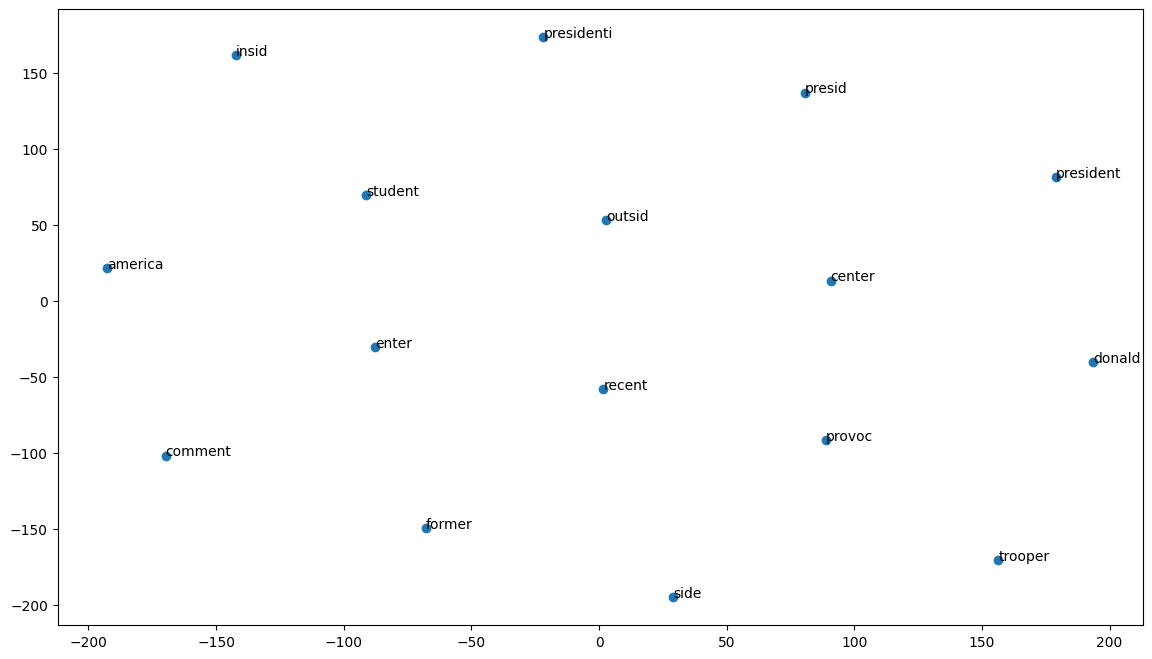

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
distri = TSNE(n_components=2, perplexity=15)
y = distri.fit_transform(vectors)

plt.figure(figsize=(14, 8))
plt.scatter(y[:, 0], y[:, 1])
for label, xy in zip(words, y):
  plt.annotate(label, xy=(xy[0], xy[1]), xytext=(0, 0), textcoords='offset points')
plt.show()

In [ ]:
result = model.wv.most_similar(positive=['woman', 'king'], negative=['man'],topn=1)
print(result)

[('speech', 0.28004956245422363)]


|FastText|GloVe|Word2Vec|
|:-:|:-:|:-:|
|('speech', 0.28004956245422363)|('queen', 0.7698540687561035)|('queen', 0.7118193507194519)|

# Practice 7

**Task 1:** think, what accuracy metric equals to if the training data contain 10000 positive examples and 100 negative and the model always returns 1.

Accuracy = 10000/10100 = 99%

Calculate accuracy

In [ ]:
# calculates accuracy for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import accuracy_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate prediction
accuracy = accuracy_score(y_true, y_pred, normalize=True)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.994


Calculate precision

In [ ]:
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_pred = pred_pos + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, average='binary')
print('Precision: %.3f' % precision)

Precision: 0.750


In [ ]:
# calculates precision for 1:1:100 dataset with 50tp,20fp, 99tp,51fp
from sklearn.metrics import precision_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in
range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate prediction
precision = precision_score(y_true, y_pred, labels=[1,2], average='micro')
print('Precision: %.3f' % precision)

Precision: 0.677


Calculate Recall

In [ ]:
# calculates recall for 1:100 dataset with 90 tp and 10 fn
from sklearn.metrics import recall_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, average='binary')
print('Recall: %.3f' % recall)

Recall: 0.900


In [ ]:
from sklearn.metrics import recall_score
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(23)] + [1 for _ in range(77)]
pred_pos2 = [0 for _ in range(5)] + [2 for _ in range(95)]
pred_neg = [0 for _ in range(10000)]
y_pred = pred_pos1 + pred_pos2 + pred_neg
# calculate recall
recall = recall_score(y_true, y_pred, labels=[1,2], average='micro')
print('Recall: %.3f' % recall)

Recall: 0.860


Precision: Appropriate when minimizing false positives is the focus.

Recall: Appropriate when minimizing false negatives is the focus.


In [ ]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-Measure: %.3f' % score)

F-Measure: 0.760


**Task 2:** Create one y_true list and y_pred0, y_pred1, y_pred2, y_pred3, according to the table below. Calculate accuracy, precision, recall and F-measure for every y_pred_. Paste the results to the table.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

y_true = []
y_pred0 = []
y_pred1 = []
y_pred2 = []
y_pred3 = []
i = 0

for i in range(0, 5):
  y_true.append(1)
  y_pred0.append(0)
  y_pred1.append(1)
  y_pred2.append(0)
  y_pred3.append(1)

for i in range(5, 95):
  y_true.append(1)
  y_pred0.append(1)
  y_pred1.append(0)
  y_pred2.append(0)
  y_pred3.append(1)

for i in range(95, 100):
  y_true.append(1)
  y_pred0.append(0)
  y_pred1.append(1)
  y_pred2.append(0)
  y_pred3.append(1)

for i in range(100, 155):
  y_true.append(0)
  y_pred0.append(1)
  y_pred1.append(0)
  y_pred2.append(0)
  y_pred3.append(1)

for i in range(155, 10100):
  y_true.append(0)
  y_pred0.append(0)
  y_pred1.append(1)
  y_pred2.append(0)
  y_pred3.append(1)

accuracy0 = accuracy_score(y_true, y_pred0, normalize=True)
accuracy1 = accuracy_score(y_true, y_pred1, normalize=True)
accuracy2 = accuracy_score(y_true, y_pred2, normalize=True)
accuracy3 = accuracy_score(y_true, y_pred3, normalize=True)
print('Accuracy_0: %.3f' % accuracy0)
print('Accuracy_1: %.3f' % accuracy1)
print('Accuracy_2: %.3f' % accuracy2)
print('Accuracy_3: %.3f' % accuracy3)
print()
precision0 = precision_score(y_true, y_pred0, average='binary')
precision1 = precision_score(y_true, y_pred1, average='binary')
precision2 = precision_score(y_true, y_pred2, average='binary')
precision3 = precision_score(y_true, y_pred3, average='binary')
print('Precision_0: %.3f' % precision0)
print('Precision_1: %.3f' % precision1)
print('Precision_2: %.3f' % precision2)
print('Precision_3: %.3f' % precision3)
print()
recall0 = recall_score(y_true, y_pred0, average='binary')
recall1 = recall_score(y_true, y_pred1, average='binary')
recall2 = recall_score(y_true, y_pred2, average='binary')
recall3 = recall_score(y_true, y_pred3, average='binary')
print('Recall_0: %.3f' % recall0)
print('Recall_1: %.3f' % recall1)
print('Recall_2: %.3f' % recall2)
print('Recall_3: %.3f' % recall3)
print()
score0 = f1_score(y_true, y_pred0, average='binary')
score1 = f1_score(y_true, y_pred1, average='binary')
score2 = f1_score(y_true, y_pred2, average='binary')
score3 = f1_score(y_true, y_pred3, average='binary')
print('F-Measure_0: %.3f' % score0)
print('F-Measure_1: %.3f' % score1)
print('F-Measure_2: %.3f' % score2)
print('F-Measure_3: %.3f' % score3)

Accuracy_0: 0.994
Accuracy_1: 0.006
Accuracy_2: 0.990
Accuracy_3: 0.010



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision_0: 0.621
Precision_1: 0.001
Precision_2: 0.000
Precision_3: 0.010

Recall_0: 0.900
Recall_1: 0.100
Recall_2: 0.000
Recall_3: 1.000

F-Measure_0: 0.735
F-Measure_1: 0.002
F-Measure_2: 0.000
F-Measure_3: 0.020


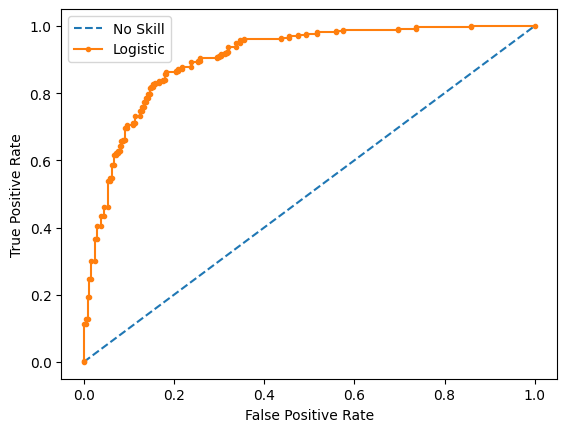

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5,random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**Task 3:**  Plot a PR curve on the same data as the ROC curve. What would be the best threshold in the case of a PR curve? Calculate PR-AUC.

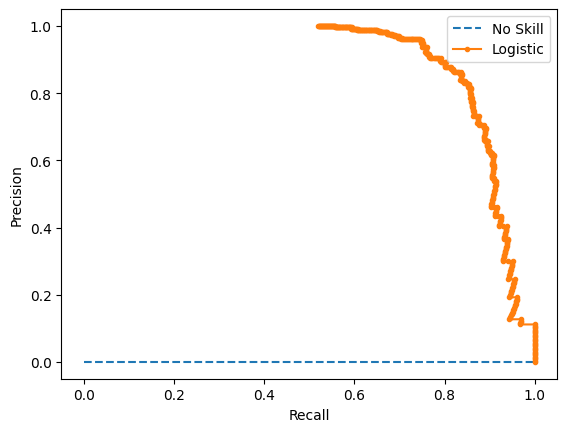

PR-AUC: 0.8977244980325834


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from matplotlib import pyplot

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5,random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 0], linestyle='--', label='No Skill')
# calculate precision-recall curve
precision, recall, _ = precision_recall_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(precision, recall, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
# calculate the precision-recall auc
auc_score = auc(recall, precision)
print('PR-AUC:', auc_score)

# Practice 8

**Task 1:** Create one y_true list and y_pred0, y_pred1, y_pred2, y_pred3, y_pred4, according to the table below.

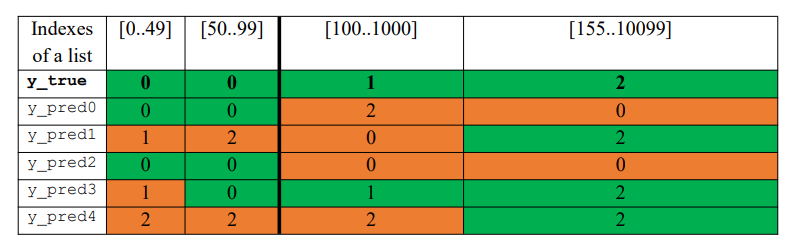

In [ ]:
import itertools

y_true = list(itertools.chain(*[[0] * 50, [0] * 50, [1] * 901, [2] * (10099 - 1000)]))
y_pred = [[]]*5
y_pred[0] = list(itertools.chain(*[[0] * 50, [0] * 50, [2] * 901, [0] * (10099 - 1000)]))
y_pred[1] = list(itertools.chain(*[[1] * 50, [2] * 50, [0] * 901, [2] * (10099 - 1000)]))
y_pred[2] = list(itertools.chain(*[[0] * 50, [0] * 50, [0] * 901, [0] * (10099 - 1000)]))
y_pred[3] = list(itertools.chain(*[[1] * 50, [0] * 50, [1] * 901, [2] * (10099 - 1000)]))
y_pred[4] = list(itertools.chain(*[[2] * 50, [2] * 50, [2] * 901, [2] * (10099 - 1000)]))

**Task 2:** Calculate accuracy, precision, recall and f-measure for every y_pred_. Paste the results to the table below. Analyse the results

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Name", "Accuracy", "Precision", "Recall", "F–score"]

for i, j in enumerate(y_pred):
  table.add_row(['y_pred_' + str(i),
                 accuracy_score(y_true, j, normalize=True),
                 precision_score(y_true, j, average='macro'),
                 recall_score(y_true, j, average='macro'),
                 f1_score(y_true, j, average='macro')])

print(table)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


+----------+----------------------+-----------------------+--------------------+----------------------+
|   Name   |       Accuracy       |       Precision       |       Recall       |       F–score        |
+----------+----------------------+-----------------------+--------------------+----------------------+
| y_pred_0 | 0.009900990099009901 | 0.0036235822734355188 | 0.3333333333333333 | 0.007169229666272359 |
| y_pred_1 |  0.9008910891089109  |   0.3315116406164608  | 0.3333333333333333 | 0.33241999123191585  |
| y_pred_2 | 0.009900990099009901 | 0.0033003300330033004 | 0.3333333333333333 | 0.006535947712418301 |
| y_pred_3 |  0.995049504950495   |   0.9824745881528215  | 0.8333333333333334 |  0.8798896088312934  |
| y_pred_4 |  0.9008910891089109  |   0.3002970297029703  | 0.3333333333333333 |  0.315953955935205   |
+----------+----------------------+-----------------------+--------------------+----------------------+


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Highest accuracy belongs to y_pred1, y_pred2 and y_pred3, while y_pred3 has the highest precision, recall and F-score. Y_pred1 and y_pred2 have high accuracy because of high true positive values.